In [22]:
# let's import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import zipfile
from zipfile import ZipFile
import requests
import io

warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib


### Preliminary Data Analysis and Cleaning


### Preliminary Data Analysis

# Let's display the first 6 rows and the dataset shape.



#### 1. Preliminary Data Analysis and Cleaning
Objectives To load, inspect, and clean the dataset.

Instructions

Download, unzip and load the data folder from https://archive.ics.uci.edu/static/public/186/wine+quality.zip. Select the winequality-white.csvfile. Load it as white-wine.csv..
Display the first 6 rows and dataset shape.
Check for missing values and handle them appropriately.
Check for duplicates and remove them if necessary.
Verify data types and correct them if needed.
Provide a brief markdown summary of all data cleaning actions taken.


In [23]:



url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"


response = requests.get(url)

with ZipFile(io.BytesIO(response.content)) as z:
    
    print("Files in zip:", z.namelist())

    with z.open('winequality-white.csv') as f:
        white_wine = pd.read_csv(f, sep=';')

white_wine.to_csv('white-wine.csv', index=False)

df = pd.read_csv('white-wine.csv')


Files in zip: ['winequality-red.csv', 'winequality-white.csv', 'winequality.names']


In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 2.Display the first 6 rows and dataset shape.

In [25]:
def rows_shape():
    print("\nFirst 6 columns:" ,df.head(6))

    print("\nShape of our dataset", df.shape)

In [26]:
rows_shape()


First 6 columns:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19      

#### 3. Check for duplicates and remove them if necessary.

In [27]:
# Let's check for missing values and handle them

def missing():
    missing_values = df.isna().sum()

    if missing_values.sum() > 0:
        print(missing_values[missing_values] > 0)

    else:
        print("No missing values in our dataset")

In [28]:
missing()

No missing values in our dataset


#### 4. Check for duplicates and remove them if necessary.

In [29]:
def duplicates():
    print("Duplicates in our dataset : ", df.duplicated().sum())

    # let's drop the duplicates in our dataset

def dropping_our_duplicates():
    df.drop_duplicates()



In [30]:
duplicates()


Duplicates in our dataset :  937


In [31]:
dropping_our_duplicates()

In [32]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

np.int64(0)

#### 5. Verify data types and correct them if needed.

In [34]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Our dataset types are in correct format 

### Summary of the data cleaning actions


I loaded the dataset and check for missing values using df.isna().sum(), our dataset is clean so there were no missing values. Then i checked for duplicates which were 937, i dropped the duplicates because our dataset has 4000+ columns and then proceeded to checking the data types of our data and there all appeared to be in the correct data types.

### Exploratory Data Analysis (EDA) and Scaling


2. Exploratory Data Analysis (EDA) and Scaling
Objectives To explore the dataset through univariate analysis on the features,and correlation of target and features only, and prepare it for modeling through scaling.

Instructions

Perform univariate analysis on all numerical features (use any of - histograms, boxplots, or countplots).
Examine the correlation of each feature with the target variable (quality).
Map the quality column into categorical classes as follows:
9- Best
8 - Best
7 - Good
6 - Good
5 - Average
4 - Bad
3 - Bad
Ensure this mapped categorical target is used for all subsequent modeling steps.
Split the dataset into features X and target y.
Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.
Do not perform any feature engineering — all features should be used as they are.


In [35]:

numerical_features = df.select_dtypes(include=['float64','int64'])

def univariate_analysis(df, column):
    
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    

    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. ")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: fixed acidity
       fixed acidity
count    3961.000000
mean        6.839346
std         0.866860
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.696
Kurtosis: 2.253


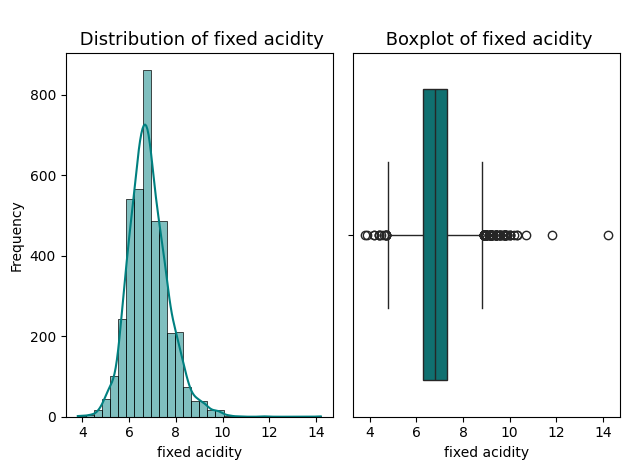

fixed acidity is moderately skewed.
 Feature: volatile acidity
       volatile acidity
count       3961.000000
mean           0.280538
std            0.103437
min            0.080000
25%            0.210000
50%            0.260000
75%            0.330000
max            1.100000

Skewness: 1.641
Kurtosis: 5.328


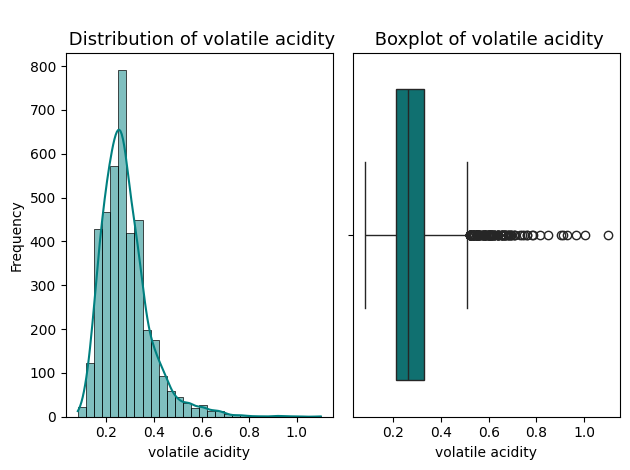


 volatile acidity is highly skewed. 
 Feature: citric acid
       citric acid
count  3961.000000
mean      0.334332
std       0.122446
min       0.000000
25%       0.270000
50%       0.320000
75%       0.390000
max       1.660000

Skewness: 1.311
Kurtosis: 6.845


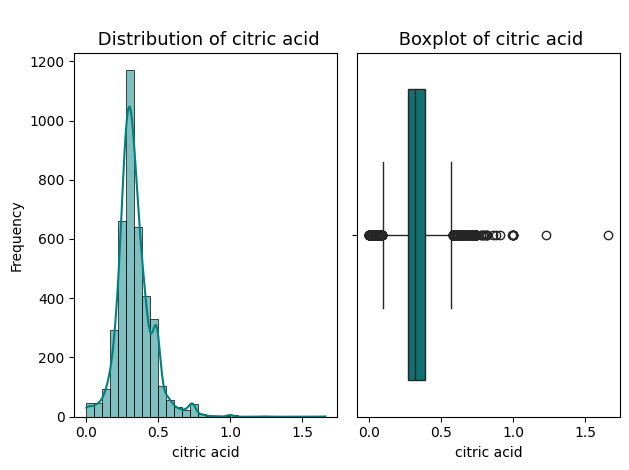


 citric acid is highly skewed. 
 Feature: residual sugar
       residual sugar
count     3961.000000
mean         5.914819
std          4.861646
min          0.600000
25%          1.600000
50%          4.700000
75%          8.900000
max         65.800000

Skewness: 1.334
Kurtosis: 5.682


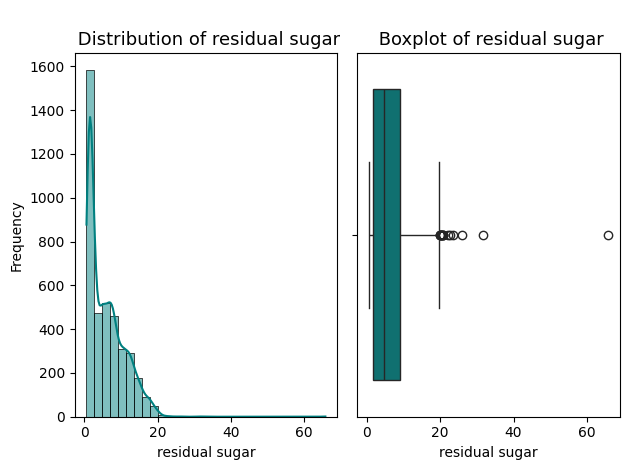


 residual sugar is highly skewed. 
 Feature: chlorides
         chlorides
count  3961.000000
mean      0.045905
std       0.023103
min       0.009000
25%       0.035000
50%       0.042000
75%       0.050000
max       0.346000

Skewness: 4.969
Kurtosis: 35.530


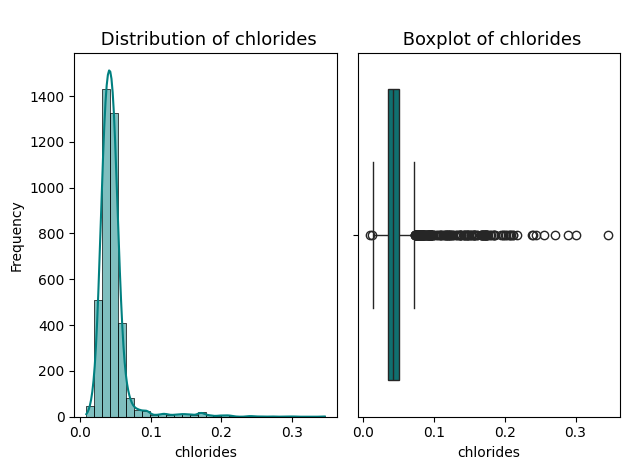


 chlorides is highly skewed. 
 Feature: free sulfur dioxide
       free sulfur dioxide
count          3961.000000
mean             34.889169
std              17.210021
min               2.000000
25%              23.000000
50%              33.000000
75%              45.000000
max             289.000000

Skewness: 1.567
Kurtosis: 13.434


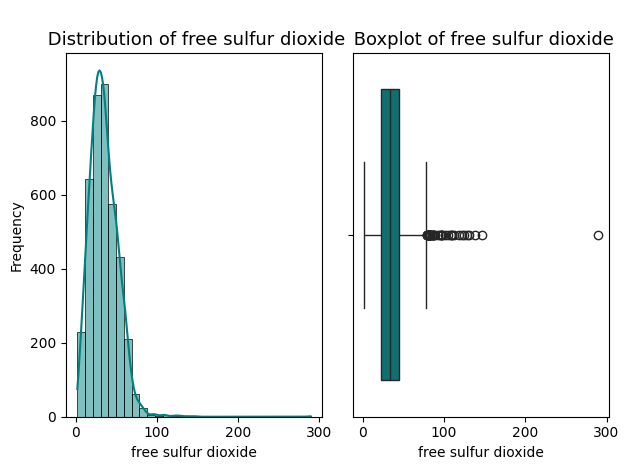


 free sulfur dioxide is highly skewed. 
 Feature: total sulfur dioxide
       total sulfur dioxide
count           3961.000000
mean             137.193512
std               43.129065
min                9.000000
25%              106.000000
50%              133.000000
75%              166.000000
max              440.000000

Skewness: 0.457
Kurtosis: 0.735


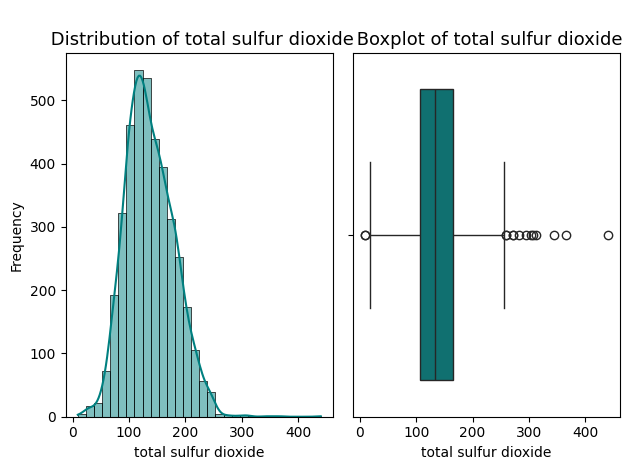

total sulfur dioxide is fairly symmetric.
 Feature: density
           density
count  3961.000000
mean      0.993790
std       0.002905
min       0.987110
25%       0.991620
50%       0.993500
75%       0.995710
max       1.038980

Skewness: 1.273
Kurtosis: 14.185


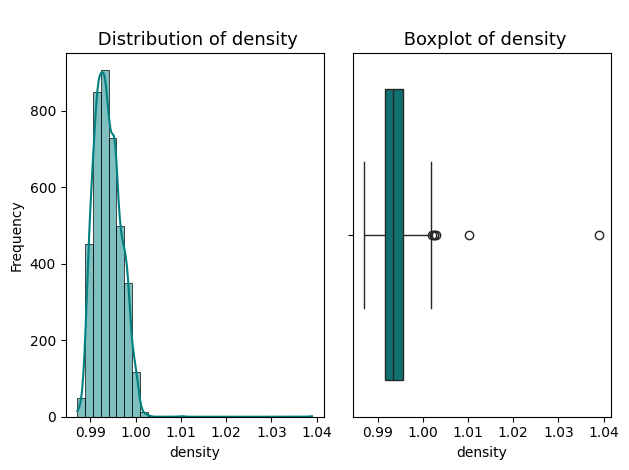


 density is highly skewed. 
 Feature: pH
                pH
count  3961.000000
mean      3.195458
std       0.151546
min       2.720000
25%       3.090000
50%       3.180000
75%       3.290000
max       3.820000

Skewness: 0.455
Kurtosis: 0.550


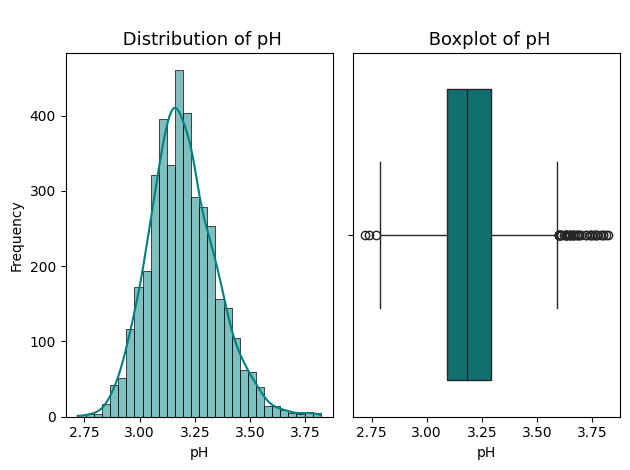

pH is fairly symmetric.
 Feature: sulphates
         sulphates
count  3961.000000
mean      0.490351
std       0.113523
min       0.220000
25%       0.410000
50%       0.480000
75%       0.550000
max       1.080000

Skewness: 0.938
Kurtosis: 1.565


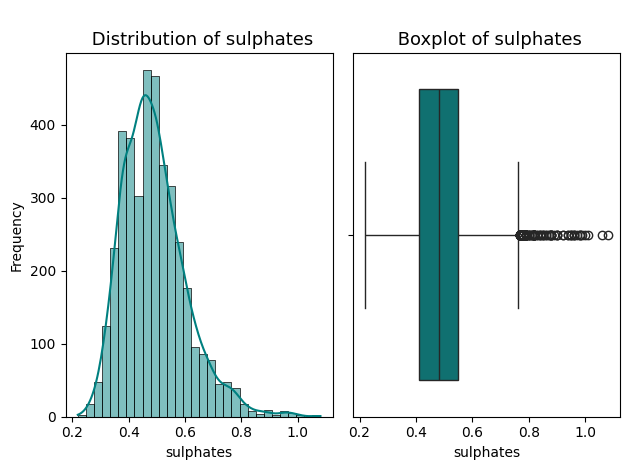

sulphates is moderately skewed.
 Feature: alcohol
           alcohol
count  3961.000000
mean     10.589358
std       1.217076
min       8.000000
25%       9.500000
50%      10.400000
75%      11.400000
max      14.200000

Skewness: 0.451
Kurtosis: -0.696


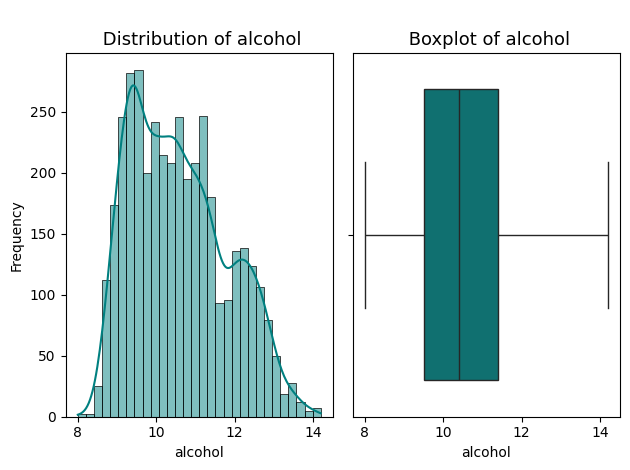

alcohol is fairly symmetric.
 Feature: quality
           quality
count  3961.000000
mean      5.854835
std       0.890683
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

Skewness: 0.112
Kurtosis: 0.299


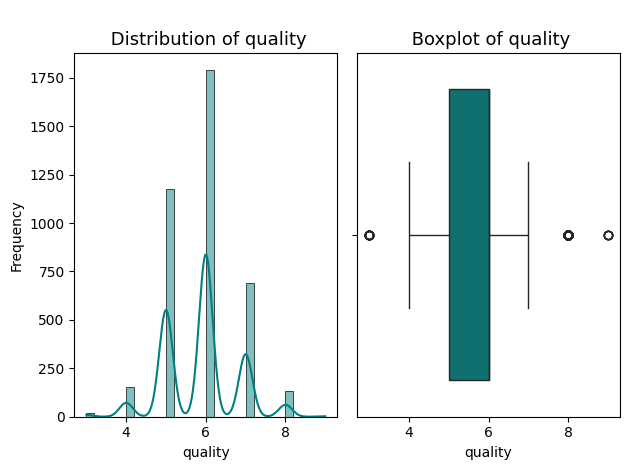

quality is fairly symmetric.


In [36]:
for col in df:
    univariate_analysis(df, col)

In [37]:
def univariate_analysis_of_features():
    univariate_analysis(df,'fixed acidity')
    univariate_analysis(df,'volatile acidity')
    univariate_analysis(df,'citric acidity')
    univariate_analysis(df,'residual sugar')
    univariate_analysis(df,'chlorides')
    univariate_analysis(df,'free sulfur dioxide')
    univariate_analysis(df,'total sulfur dioxide')

In [38]:


def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


#### 3. Map the quality column into categorical classes as follows:
9- Best
8 - Best
7 - Good
6 - Good
5 - Average
4 - Bad
3 - Bad
Ensure this mapped categorical target is used for all subsequent modeling steps.

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [40]:
def mapping():
    df = df.replace({"quality": {9:"best",8:"best",7:"Good",6:"Good",5:"Average",4:"Bad",3:"Bad"}})

In [41]:
df = df.replace({"quality":{9:"best",8:"best",7:"best",6:"Good",5:"Average",4:"Bad",3:"Bad"}})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Good


In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Good


#### 5. Split the dataset into features X and target y.

In [43]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [44]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


#### 6. Apply appropriate scaling

In [45]:
scaler = MinMaxScaler()

In [46]:

X_scaled = scaler.fit_transform(X)

### 

3. Build a Base Classification Model
Objectives To establish a simple baseline classification model.

Instructions

Split the data into training and testing sets (e.g., 80/20).
Train a simple model such as Logistic Regression or Decision Tree Classifier.
Evaluate the model using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix.
Provide a short interpretation of what the metrics mean in relation to the model’s predictive ability.


#### 1. Split the data into training and testing sets (e.g., 80/20).

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=123435)

print(f"Training shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Training shape: (3168, 11)
Test shape: (793, 11)


In [48]:
models1 = {
    "Logistic Regression" : LogisticRegression()
   
}

Training Logistic Regression.....
Logistic Regression Accuracy 0.5409836065573771


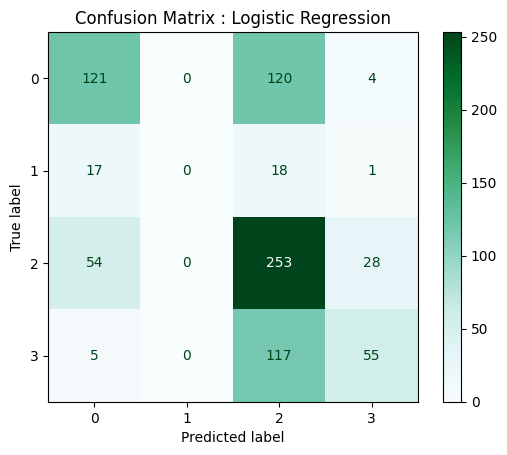

In [49]:
results = {}
for model_name, model in models1.items():
    print(f"Training {model_name}.....")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy {accuracy}")



    confusion_matrix_evaluation = confusion_matrix(y_test,y_pred)
    display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_evaluation)

    display_confusion_matrix.plot(cmap = 'BuGn')
    plt.title(f"Confusion Matrix : {model_name}")
    plt.show()

In [50]:
# Classification report to analyse our Accuracy , Precision, and Recall

classification = classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

     Average       0.61      0.49      0.55       245
         Bad       0.00      0.00      0.00        36
        Good       0.50      0.76      0.60       335
        best       0.62      0.31      0.42       177

    accuracy                           0.54       793
   macro avg       0.43      0.39      0.39       793
weighted avg       0.54      0.54      0.52       793




#### 4. Build and Compare Multiple Models
Objectives To build and compare different classification algorithms and identify the best-performing one.

Instructions

Train at least three different classification models (e.g., Random Forest, K-Nearest Neighbors, Gradient Boosting, Support Vector Machine).
Evaluate each model using the same set of metrics: Accuracy, Precision, Recall, F1-score, and Confusion Matrix.
Identify and justify which model performs best based on a balance of these metrics.


In [51]:
models = {

    "Random Forest Classifier" : RandomForestClassifier(),
    "K Nearest Neighbors" : KNeighborsClassifier(),
    "SVM" : SVC()
}

In [52]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}.....")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   

Training Random Forest Classifier.....
Training K Nearest Neighbors.....
Training SVM.....


Training Random Forest Classifier.....
Random Forest Classifier Accuracy 0.5636822194199244


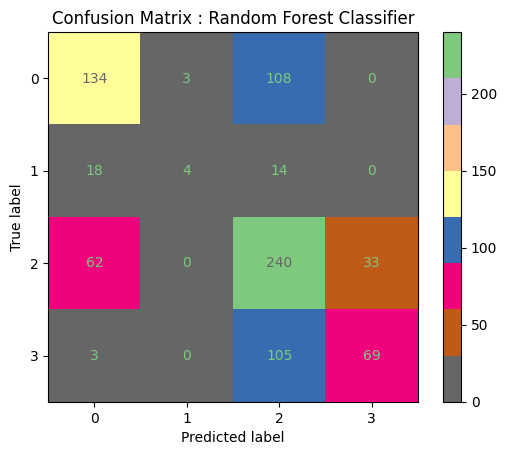

Training K Nearest Neighbors.....
K Nearest Neighbors Accuracy 0.5485498108448928


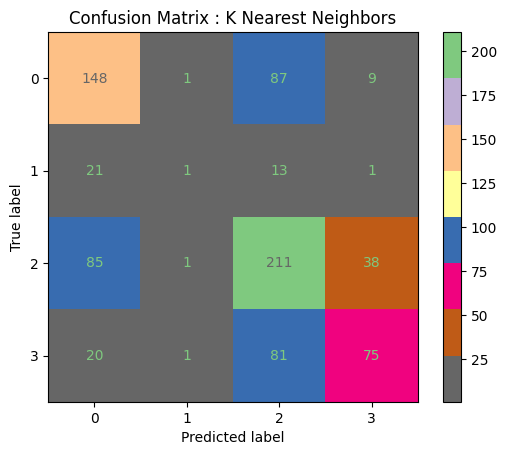

Training SVM.....
SVM Accuracy 0.5573770491803278


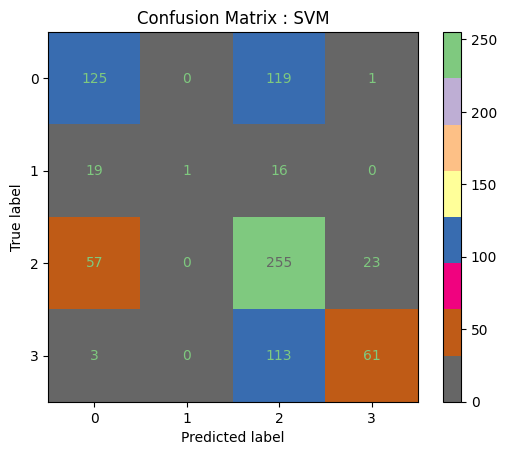

              precision    recall  f1-score   support

     Average       0.61      0.51      0.56       245
         Bad       1.00      0.03      0.05        36
        Good       0.51      0.76      0.61       335
        best       0.72      0.34      0.47       177

    accuracy                           0.56       793
   macro avg       0.71      0.41      0.42       793
weighted avg       0.61      0.56      0.54       793



In [53]:
results = {}
for model_name, model in models.items():
    
  
    print(f"Training {model_name}.....")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


  # Accuracy Score
    accuracy = accuracy_score(y_test,y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy {accuracy}")

    
    confusion_matrix_evaluation = confusion_matrix(y_test,y_pred)
    display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_evaluation)

    display_confusion_matrix.plot(cmap = 'Accent_r')
    plt.title(f"Confusion Matrix : {model_name}")
    plt.show()


    
classification = classification_report(y_test,y_pred)
print(classification)

#### 
 Based on my models evaluation, errors, precision,recall, and f1-score. 
 <br>
 1. Random Forest has a typeII error of 106 and an accuracy of 0.554, which makes it okay but not our best model

 <br>

 2. K-Nearest Neighbors has the lowest typeII error of 87 which means the lowest False Negatives predictions among our models and also an average accuracy of 0.549 score which makes it our best model 

 <br>

 3. Support Vector Machine has a typeII error of 119 and an accuracy of 0.557, which makes it okay but not our best model


#### 
5. Optimize Model Using Randomized Search
Objectives To fine-tune the best-performing model for improved performance.

Instructions

Use RandomizedSearchCV to perform hyperparameter optimization on the best model.
Retrain the model using the optimal parameters found.
Re-evaluate the model using the same classification metrics.
Provide a short commentary on whether optimization improved model performance and why.


In [54]:
Kn = KNeighborsClassifier()
Kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [55]:
params_grid = {
    "leaf_size" : [20,30,50],
    "n_neighbors" : [2,5,10],
    "weights" : ['unifrom','distance']

}

In [56]:



random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=params_grid,
    n_iter=20,              
    scoring='accuracy',    
    cv=5,                   
    n_jobs=-1,              
    verbose=1,
    random_state=123
)

random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 10, 'leaf_size': 20}
Best Score: 0.5438799766770822


In [57]:
best_model = random_search.best_estimator_





y_pred = best_model.predict(X_test)

print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

     Average       0.60      0.57      0.58       245
         Bad       0.67      0.11      0.19        36
        Good       0.53      0.67      0.59       335
        best       0.59      0.45      0.51       177

    accuracy                           0.56       793
   macro avg       0.60      0.45      0.47       793
weighted avg       0.57      0.56      0.55       793



In [58]:
joblib.dump(scaler,"scaler.pkl")
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [59]:


joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']